<a href="https://colab.research.google.com/github/SrijaC2/Fashion_Image_Classifier/blob/main/2nd_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
label = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

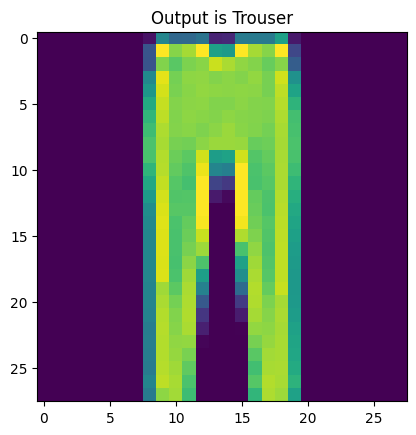

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
i = np.random.randint(0,50000)
op = label[y_train[i]]
plt.imshow(x_train[i])
plt.title(f"Output is {op}")
plt.show()

In [ ]:
x_train[0].max()

255

In [ ]:
x_train[0].min()

0

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
cnn1 = tf.keras.Sequential()
cnn1.add(tf.keras.layers.Conv2D(28,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
cnn1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn1.add(tf.keras.layers.Conv2D(56,kernel_size=(3,3),activation='relu'))
cnn1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn1.add(tf.keras.layers.Conv2D(28,kernel_size=(3,3),activation='relu'))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dropout(0.5))
cnn1.add(tf.keras.layers.Dense(56,activation='relu'))
cnn1.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 56)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 28)          14140     
                                                                 
 flatten (Flatten)           (None, 252)               0

In [ ]:
cnn1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(patience=5)
history = cnn1.fit(x_train, y_train, batch_size=100, epochs=100, validation_split=0.1,callbacks=callback)


Epoch 1/100
540/540 [==============================] - 13s 5ms/step - loss: 0.7742 - accuracy: 0.7116 - val_loss: 0.4781 - val_accuracy: 0.8130
Epoch 2/100
540/540 [==============================] - 3s 5ms/step - loss: 0.5151 - accuracy: 0.8095 - val_loss: 0.4269 - val_accuracy: 0.8350
Epoch 3/100
540/540 [==============================] - 2s 4ms/step - loss: 0.4484 - accuracy: 0.8340 - val_loss: 0.3620 - val_accuracy: 0.8635
Epoch 4/100
540/540 [==============================] - 2s 4ms/step - loss: 0.4064 - accuracy: 0.8518 - val_loss: 0.3418 - val_accuracy: 0.8715
Epoch 5/100
540/540 [==============================] - 2s 4ms/step - loss: 0.3740 - accuracy: 0.8642 - val_loss: 0.3165 - val_accuracy: 0.8805
Epoch 6/100
540/540 [==============================] - 2s 4ms/step - loss: 0.3541 - accuracy: 0.8721 - val_loss: 0.2993 - val_accuracy: 0.8912
Epoch 7/100
540/540 [==============================] - 3s 6ms/step - loss: 0.3343 - accuracy: 0.8791 - val_loss: 0.2831 - val_accuracy: 0.894

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

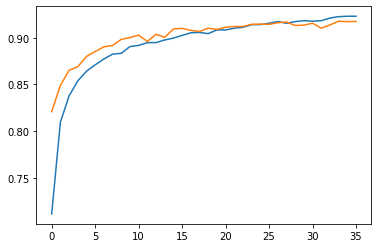

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
score = cnn1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2418418526649475
Test accuracy: 0.9146000146865845
